In [1]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk import pos_tag, word_tokenize, ne_chunk
import spacy

In [2]:
# Install and download necessary packages
!pip install spacy
!python -m spacy download en_core_web_sm
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [49]:
# Words used in the program
words = ["bear", "rose", "square", "lead","running"]
sentence = "The quick brown fox jumps over the lazy dog."


In [48]:
# Function to get synonyms
def get_synonyms(word):
    synonyms = set()  # Use a set to avoid duplicates
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())  # Add lemma (synonym) to the set
    if not synonyms:
        print(f"No synonyms found for '{word}'.")
    else:
        print(f"Synonyms for '{word}': {list(synonyms)}")
for word in words:
  get_synonyms(word)

Synonyms for 'bear': ['stomach', 'take_over', 'digest', 'carry', 'turn_out', 'wear', 'tolerate', 'gestate', 'expect', 'abide', 'suffer', 'deport', 'have', 'support', 'stand', 'comport', 'pay', 'stick_out', 'acquit', 'conduct', 'hold', 'have_a_bun_in_the_oven', 'assume', 'birth', 'behave', 'deliver', 'bear', 'accept', 'yield', 'endure', 'contain', 'brook', 'put_up', 'give_birth']
Synonyms for 'rose': ['rosaceous', 'stand_up', 'rise_up', 'turn_out', 'climb_up', 'arise', 'rear', 'grow', 'develop', 'rose', 'ascend', 'come_up', 'surface', 'prove', 'resurrect', 'wax', 'originate', 'rosebush', 'mount', 'climb', 'heighten', 'move_up', 'rebel', 'go_up', 'lift', 'spring_up', 'rosiness', 'rose_wine', 'uprise', 'get_up', 'roseate', 'blush_wine', 'jump', 'pink_wine', 'rise']
Synonyms for 'square': ['hearty', 'substantial', 'straightforward', 'lame', 'square', 'foursquare', 'straight', 'public_square', 'square_up', 'second_power', 'satisfying', 'feather', 'squarely', 'square_toes', 'solid']
Synonyms

In [28]:
# Function to get the 3rd meaning of the word
def get_third_meaning(word):
    syns = get_synonyms(word)
    meaning = syns[2].definition() if len(syns) > 2 else "No third meaning available"
    print(f"Third meaning of {word}: {meaning}\n")
    return meaning
for word in words:
  get_third_meaning(word)

Synonyms for bear: [Synset('bear.n.01'), Synset('bear.n.02'), Synset('bear.v.01'), Synset('give_birth.v.01'), Synset('digest.v.03'), Synset('bear.v.04'), Synset('bear.v.05'), Synset('bear.v.06'), Synset('hold.v.11'), Synset('yield.v.10'), Synset('wear.v.02'), Synset('behave.v.02'), Synset('bear.v.11'), Synset('hold.v.14'), Synset('have_a_bun_in_the_oven.v.01')]
Third meaning of bear: have

Synonyms for rose: [Synset('rose.n.01'), Synset('blush_wine.n.01'), Synset('rose.n.03'), Synset('rise.v.01'), Synset('rise.v.02'), Synset('arise.v.03'), Synset('rise.v.04'), Synset('surface.v.01'), Synset('originate.v.01'), Synset('ascend.v.08'), Synset('wax.v.02'), Synset('heighten.v.01'), Synset('get_up.v.02'), Synset('rise.v.11'), Synset('rise.v.12'), Synset('rise.v.13'), Synset('rebel.v.01'), Synset('rise.v.15'), Synset('rise.v.16'), Synset('resurrect.v.03'), Synset('rose.s.01')]
Third meaning of rose: a dusty pink color

Synonyms for square: [Synset('square.n.01'), Synset('square.n.02'), Synset(

In [39]:
# Function to extract words by PoS from synonyms
def extract_by_pos(word, pos):
    extracted = set(lemma.name() for syn in get_synonyms(word) if syn.pos() == pos for lemma in syn.lemmas())
    print(f"Extracted {pos} for {word}: {extracted}\n")
    return extracted
for word in words:
  extract_by_pos(word, 'n')
  extract_by_pos(word, 'v')
  extract_by_pos(word, 'a')
  extract_by_pos(word, 'r')

Synonyms for bear: [Synset('bear.n.01'), Synset('bear.n.02'), Synset('bear.v.01'), Synset('give_birth.v.01'), Synset('digest.v.03'), Synset('bear.v.04'), Synset('bear.v.05'), Synset('bear.v.06'), Synset('hold.v.11'), Synset('yield.v.10'), Synset('wear.v.02'), Synset('behave.v.02'), Synset('bear.v.11'), Synset('hold.v.14'), Synset('have_a_bun_in_the_oven.v.01')]
Extracted n for bear: {'bear'}

Synonyms for bear: [Synset('bear.n.01'), Synset('bear.n.02'), Synset('bear.v.01'), Synset('give_birth.v.01'), Synset('digest.v.03'), Synset('bear.v.04'), Synset('bear.v.05'), Synset('bear.v.06'), Synset('hold.v.11'), Synset('yield.v.10'), Synset('wear.v.02'), Synset('behave.v.02'), Synset('bear.v.11'), Synset('hold.v.14'), Synset('have_a_bun_in_the_oven.v.01')]
Extracted v for bear: {'stomach', 'take_over', 'digest', 'carry', 'turn_out', 'wear', 'tolerate', 'gestate', 'expect', 'abide', 'suffer', 'deport', 'have', 'support', 'stand', 'comport', 'pay', 'stick_out', 'acquit', 'conduct', 'hold', 'hav

In [38]:
# Function to get word definition
def get_definition(word):
    syns = get_synonyms(word)
    definition = syns[0].definition() if syns else "No definition available"
    print(f"Definition of {word}: {definition}\n")
    return definition
for word in words:
    get_definition(word)


Synonyms for bear: [Synset('bear.n.01'), Synset('bear.n.02'), Synset('bear.v.01'), Synset('give_birth.v.01'), Synset('digest.v.03'), Synset('bear.v.04'), Synset('bear.v.05'), Synset('bear.v.06'), Synset('hold.v.11'), Synset('yield.v.10'), Synset('wear.v.02'), Synset('behave.v.02'), Synset('bear.v.11'), Synset('hold.v.14'), Synset('have_a_bun_in_the_oven.v.01')]
Definition of bear: massive plantigrade carnivorous or omnivorous mammals with long shaggy coats and strong claws

Synonyms for rose: [Synset('rose.n.01'), Synset('blush_wine.n.01'), Synset('rose.n.03'), Synset('rise.v.01'), Synset('rise.v.02'), Synset('arise.v.03'), Synset('rise.v.04'), Synset('surface.v.01'), Synset('originate.v.01'), Synset('ascend.v.08'), Synset('wax.v.02'), Synset('heighten.v.01'), Synset('get_up.v.02'), Synset('rise.v.11'), Synset('rise.v.12'), Synset('rise.v.13'), Synset('rebel.v.01'), Synset('rise.v.15'), Synset('rise.v.16'), Synset('resurrect.v.03'), Synset('rose.s.01')]
Definition of rose: any of many 

In [37]:
# Function to get antonyms
def get_antonyms(word):
    antonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())
    print(f"Antonyms for {word}: {antonyms}\n")
    return antonyms
for word in words:
 get_antonyms(word)

Antonyms for bear: {'bull'}

Antonyms for rose: {'set', 'turn_in', 'fall', 'wane', 'sit_down', 'go_to_bed'}

Antonyms for square: {'round', 'crooked'}

Antonyms for lead: {'follow', 'deficit'}



In [52]:
# Function for lemmatization
def lemmatization(word):
    lemmatizer = WordNetLemmatizer()
    # Lemmatize with POS as verb ('v')
    lemmatized = lemmatizer.lemmatize(word, pos='v')
    print(f"Lemmatized {word}: {lemmatized}\n")
    return lemmatized
for word in words:
  lemmatization(word)

Lemmatized bear: bear

Lemmatized rose: rise

Lemmatized square: square

Lemmatized lead: lead

Lemmatized running: run



In [53]:
# Function for stemming and lemmatization comparison
def stemming_vs_lemmatization(word):
    results = {
        "PorterStemmer": PorterStemmer().stem(word),
        "LancasterStemmer": LancasterStemmer().stem(word),
        "SnowballStemmer": SnowballStemmer("english").stem(word),
        "Lemmatizer": lemmatization(word)
    }
    print(f"Stemming vs Lemmatization for {word}: {results}\n")
    return results
for word in words:
  stemming_vs_lemmatization(word)

Lemmatized bear: bear

Stemming vs Lemmatization for bear: {'PorterStemmer': 'bear', 'LancasterStemmer': 'bear', 'SnowballStemmer': 'bear', 'Lemmatizer': 'bear'}

Lemmatized rose: rise

Stemming vs Lemmatization for rose: {'PorterStemmer': 'rose', 'LancasterStemmer': 'ros', 'SnowballStemmer': 'rose', 'Lemmatizer': 'rise'}

Lemmatized square: square

Stemming vs Lemmatization for square: {'PorterStemmer': 'squar', 'LancasterStemmer': 'squ', 'SnowballStemmer': 'squar', 'Lemmatizer': 'square'}

Lemmatized lead: lead

Stemming vs Lemmatization for lead: {'PorterStemmer': 'lead', 'LancasterStemmer': 'lead', 'SnowballStemmer': 'lead', 'Lemmatizer': 'lead'}

Lemmatized running: run

Stemming vs Lemmatization for running: {'PorterStemmer': 'run', 'LancasterStemmer': 'run', 'SnowballStemmer': 'run', 'Lemmatizer': 'run'}



In [68]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# Function for PoS tagging
def pos_tagging(sentence):
    tagged = pos_tag(word_tokenize(sentence))
    print(f"PoS tagging for sentence: {tagged}\n")
    return tagged

pos_tagging(sentence)


PoS tagging for sentence: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumps', 'VBZ'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.')]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.9 MB/s eta 0:00:00


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


Named Entity Recognition for sentence: (S
  The/DT
  quick/JJ
  brown/NN
  fox/NN
  jumps/VBZ
  over/IN
  the/DT
  lazy/JJ
  dog/NN
  ./.)



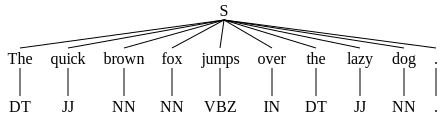

In [67]:
!pip install svgling
nltk.download('maxent_ne_chunker_tab')
# Function for Named Entity Recognition (NER)
def named_entity_recognition(sentence):
    ner = ne_chunk(pos_tag(word_tokenize(sentence)))
    print(f"Named Entity Recognition for sentence: {ner}\n")
    return ner
named_entity_recognition(sentence)

In [69]:
# Function for dependency parsing
def dependency_parsing(sentence):
    parsed = [(token.text, token.dep_, token.head.text) for token in nlp(sentence)]
    print(f"Dependency parsing for sentence: {parsed}\n")
    return parsed

for word in words:
  dependency_parsing(sentence)

Dependency parsing for sentence: [('The', 'det', 'fox'), ('quick', 'amod', 'fox'), ('brown', 'amod', 'fox'), ('fox', 'nsubj', 'jumps'), ('jumps', 'ROOT', 'jumps'), ('over', 'prep', 'jumps'), ('the', 'det', 'dog'), ('lazy', 'amod', 'dog'), ('dog', 'pobj', 'over'), ('.', 'punct', 'jumps')]

Dependency parsing for sentence: [('The', 'det', 'fox'), ('quick', 'amod', 'fox'), ('brown', 'amod', 'fox'), ('fox', 'nsubj', 'jumps'), ('jumps', 'ROOT', 'jumps'), ('over', 'prep', 'jumps'), ('the', 'det', 'dog'), ('lazy', 'amod', 'dog'), ('dog', 'pobj', 'over'), ('.', 'punct', 'jumps')]

Dependency parsing for sentence: [('The', 'det', 'fox'), ('quick', 'amod', 'fox'), ('brown', 'amod', 'fox'), ('fox', 'nsubj', 'jumps'), ('jumps', 'ROOT', 'jumps'), ('over', 'prep', 'jumps'), ('the', 'det', 'dog'), ('lazy', 'amod', 'dog'), ('dog', 'pobj', 'over'), ('.', 'punct', 'jumps')]

Dependency parsing for sentence: [('The', 'det', 'fox'), ('quick', 'amod', 'fox'), ('brown', 'amod', 'fox'), ('fox', 'nsubj', 'jum

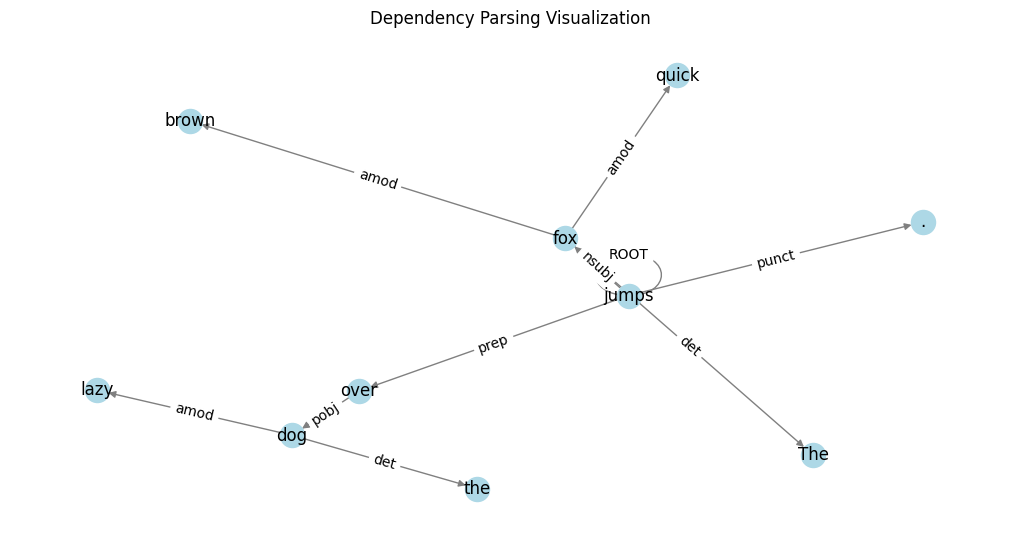

In [74]:
import matplotlib.pyplot as plt
import networkx as nx
# Visualization for Dependency Parsing
def visualize_dependency(sentence):
    doc = nlp(sentence)
    plt.figure(figsize=(10, 5))
    G = nx.DiGraph()
    for token in doc:
        G.add_edge(token.head.text, token.text, label=token.dep_)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Dependency Parsing Visualization")
    plt.show()
visualize_dependency(sentence)